In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Preprocess the data
x_train = x_train / 255.0  
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28*28)  
x_test = x_test.reshape(-1, 28*28)
y_train_cat = to_categorical(y_train, 10)  
y_test_cat = to_categorical(y_test, 10)


In [4]:
# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=5,
                    batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8762 - loss: 0.4371 - val_accuracy: 0.9620 - val_loss: 0.1287
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9637 - loss: 0.1214 - val_accuracy: 0.9690 - val_loss: 0.0976
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9749 - loss: 0.0849 - val_accuracy: 0.9719 - val_loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9825 - loss: 0.0574 - val_accuracy: 0.9747 - val_loss: 0.0834
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9864 - loss: 0.0463 - val_accuracy: 0.9742 - val_loss: 0.0833


In [7]:
# Predict on test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


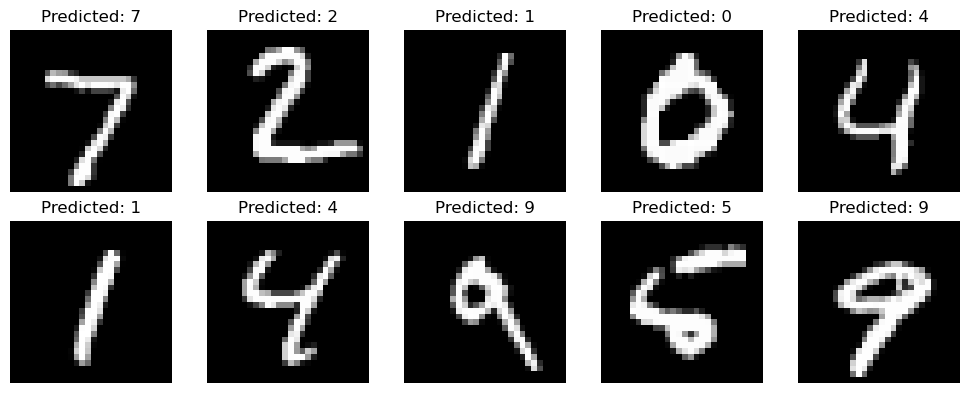

In [8]:
# Display some test images with predicted labels
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = x_test[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()